The goal of this project is to build and evaluate a regression model to predict houseprices using the "Ames Housing" dataset from Kaggle.
Students will apply supervised learning techniques to develop and refine their models,analyzing the results to improve accuracy.

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [46]:
# Load the data
data = pd.read_csv('AmesHousing.csv')  # Replace with your dataset's path
print("Data loaded successfully.")
print(data.head())

Data loaded successfully.
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condi

In [47]:
# Exploratory Data Analysis (EDA)
# 1. Check for missing values and data types
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [48]:
# Check if 'SalePrice' exists in columns
target_column = 'SalePrice'
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found. Check column names and spelling.")


In [49]:
# Separate features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

In [50]:
# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [51]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Train the model
model.fit(X_train, y_train)
print("Model trained successfully.")


Model trained successfully.


Predicting and Evaluating the Model

In [60]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred) #Calculates the Mean Absolute Error (MAE), which is the average absolute difference between the predicted and actual values.
mse = mean_squared_error(y_test, y_pred) #Computes the Mean Squared Error (MSE), which squares each error before averaging. Squaring penalizes larger errors more heavily, making MSE useful for identifying models with larger errors.
rmse = mean_squared_error(y_test, y_pred, squared=False) # Calculates the Root Mean Squared Error (RMSE), the square root of MSE, making it easier to interpret in the original units of the data (house prices here).
r2 = r2_score(y_test, y_pred) #Calculates the R-squared score, which is a measure of how well the model explains the variance in the data. R² values range from 0 to 1, with 1 indicating a perfect fit

In [61]:
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")


Model Performance:
Mean Absolute Error (MAE): 29685.154171281516
Mean Squared Error (MSE): 2112266384.892761
Root Mean Squared Error (RMSE): 45959.39930952928
R-squared (R^2): 0.7365445890569678


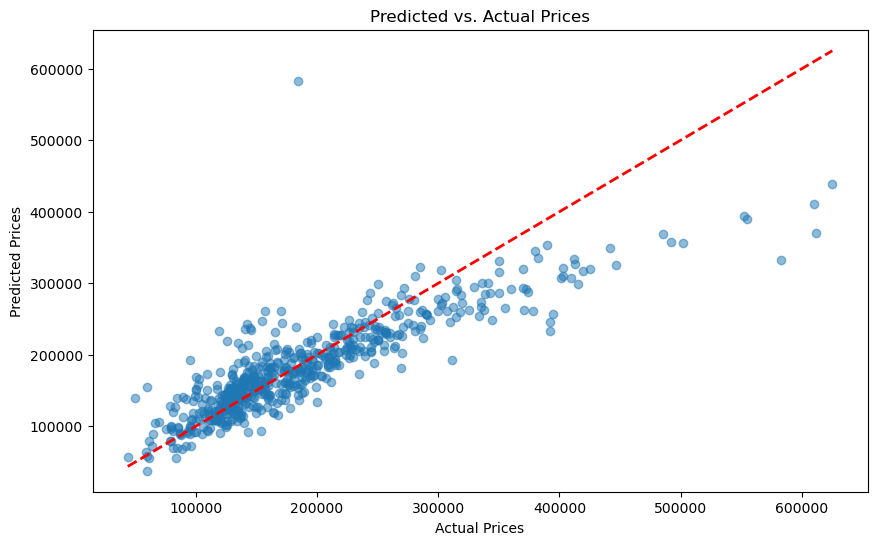

In [62]:
# Visualization 1: Predicted vs. Actual Values. To see how well the model's predictions align with actual values.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.show()

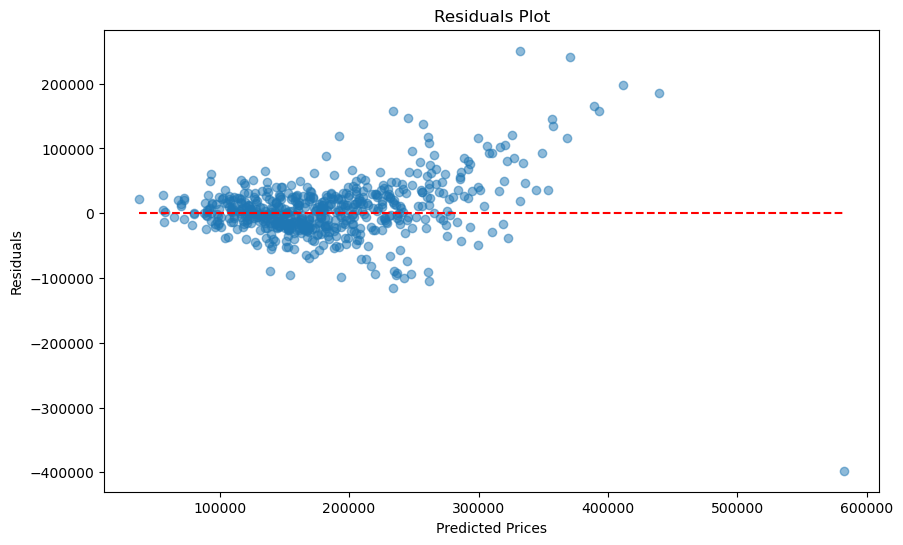

In [63]:
# Visualization 2: Residuals Plo. To check if the residuals (errors) are randomly distributed, indicating a good model fit.
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


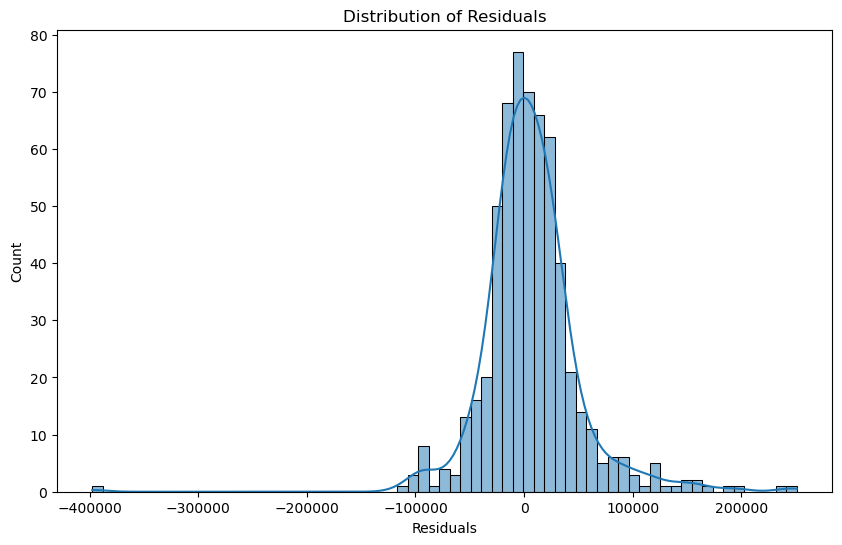

In [64]:
# Visualization 3: Distribution of Errors. To visualize the spread of errors.
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

Key Insights and Conclusion

Predicted vs. Actual Plot:

This scatter plot reveals how well the predictions align with actual prices. The closer the points are to the red diagonal line, the better the predictions.
Any significant deviations from the line highlight areas where the model may underperform, possibly indicating the need for feature tuning or model adjustments.
Residuals Plot:

The residuals (errors) should ideally be randomly distributed around zero. A clear pattern or clustering suggests the model may be biased or missing underlying patterns in the data.
If the residuals tend to increase or decrease with predicted prices, it might indicate non-linearity in the data that a linear model can't capture.
Distribution of Residuals:

The histogram shows how residuals are spread. A roughly normal distribution around zero suggests a well-calibrated model.
Skewed residuals or multiple peaks might indicate that the model isn’t fully capturing some underlying patterns or that outliers are affecting performance.


Conclusion


The linear regression model performs reasonably well for predicting house prices, as indicated by the evaluation metrics and visualizations. However, any visible patterns in residuals and deviations from zero may indicate areas for improvement. This could involve testing alternative models, adding relevant features, or transforming variables to better fit the underlying data structure. Overall, while the model provides a decent baseline, there is room to enhance predictive accuracy and address potential biases in the residuals.